In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [2]:
bank = pd.read_csv('bank.csv')

In [3]:
df = bank.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Comments: We can see that RowNumber, CustomerID and Surname are unique, so we can delete these columns later.

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Comments: there are 10,000 observations for each column. The maximum bank affiliated number of product is 4 and minimum is 1. The maximum Estimated Salary si 199992.480000 with minimum being 11.58 whxih seems very low (maybe an outlier), but scaling the data will work to build better model.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Comments: There are No Null values in the dataset. Surname , Geography and Gender are categorical variable while rest are continuous variable.

### Dropping RowNumber, CustomerID and Surname as they are unique values and serves no purpose in building the model.

In [7]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA and Data Visualization.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

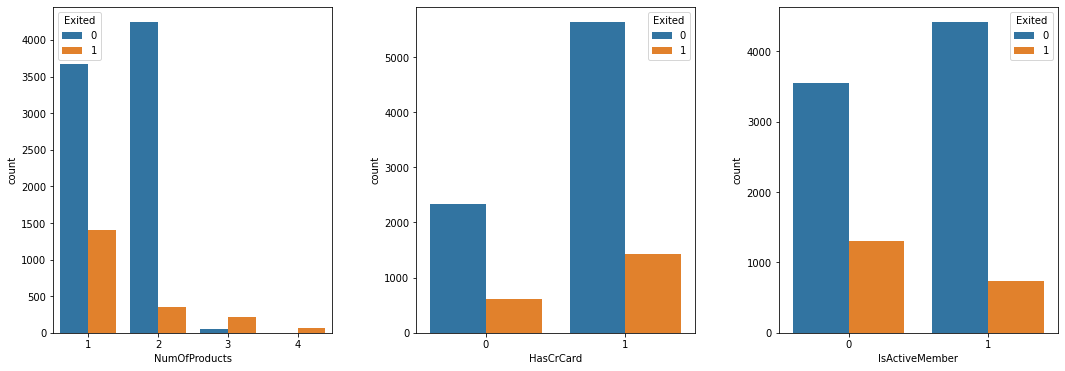

In [9]:
import seaborn as sns
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

#### Comments: The precentage of people exiting with 3 or 4 number of products is higher than people exiting with 1or 2 number of products.
#### People having credit card are more but at the same time they are the one who exit more. 
#### People who are active members are high and thye also tend to exit the bank very less (maybe they are active because they like the bank and want to stay with the bank)

### Countplot

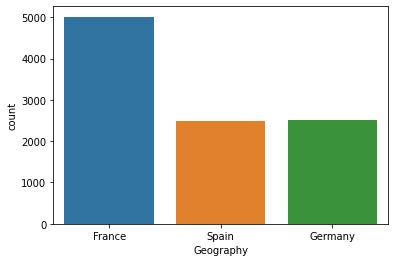

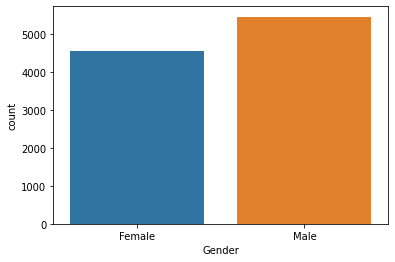

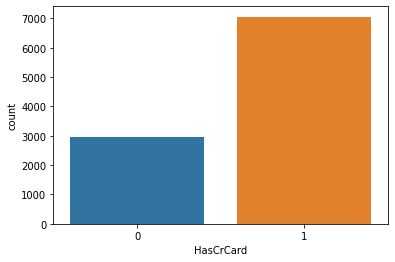

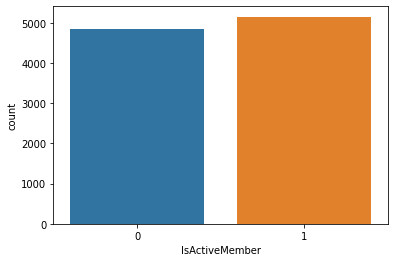

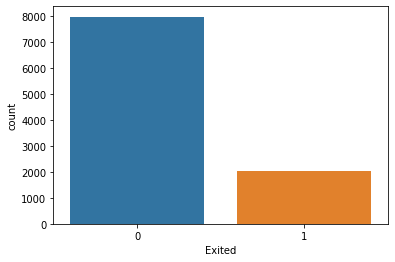

In [10]:
import warnings
warnings.filterwarnings('ignore')
for i in['Geography','Gender','HasCrCard','IsActiveMember','Exited']:
    sns.countplot(bank[i])
    plt.show()

#### Comments: The dataset contains more people from France, Higher number of Males and Higher number of people having credit card.

### Distplot

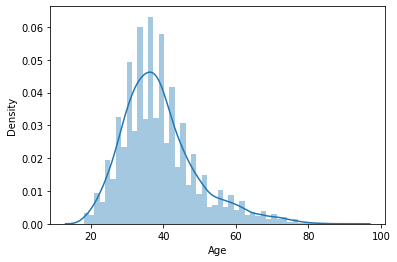

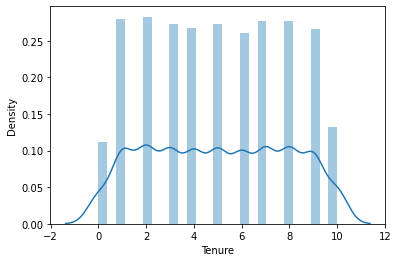

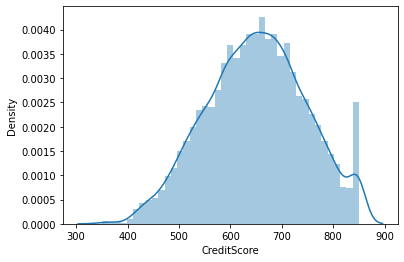

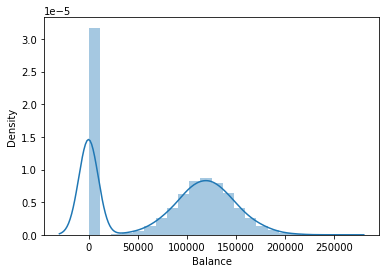

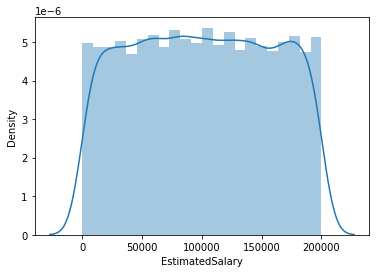

In [11]:
for i in['Age','Tenure','CreditScore','Balance','EstimatedSalary']:
    sns.distplot(bank[i])
    plt.show()

#### Comments: As we can see from the first graph the more age is concentrated between 20 yeras to 50 years
#### Average credit score is between 500-800
#### Balance is Binodal with second peak having the area between 50,000 to 200,000
#### Estimated salary is ranging from 0 to 200,000

### Heatmap

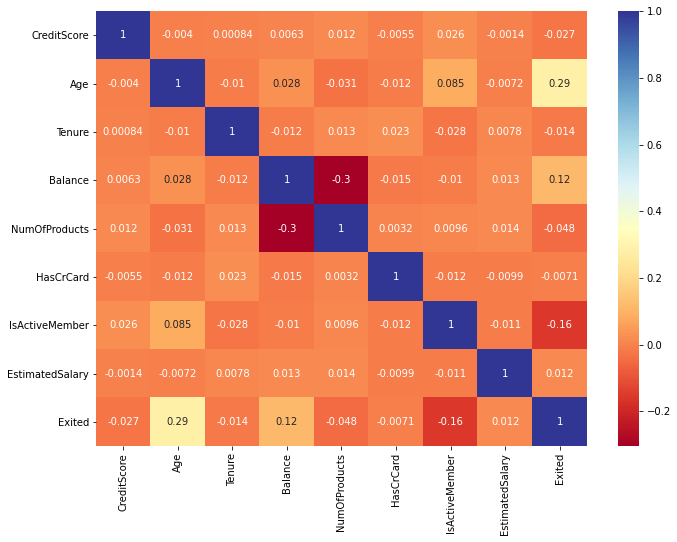

In [12]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

#### Comments: There is no significant corelation between any variable. But Number of product and Balance seems to be negatively corelated although not a high corelation.

### We will use the Label Encoding for converting Categorical variable to continuous variable.

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df['Geography']=labelencoder_X.fit_transform(df['Geography'])
df['Gender']=labelencoder_X.fit_transform(df['Gender'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Creating the Data for model, Splitting the data in Training and testing Set.

In [15]:
features = [col for col in df.columns if col != 'Exited']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Exited'], test_size=.3, random_state=7)
X_train.shape, X_test.shape

((7000, 10), (3000, 10))

### Scaling the Independant Variables in Train and Test Set

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Building the Neural network model from Keras and tensorflow

In [17]:
model = Sequential()

In [18]:
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [19]:
model.compile(optimizer = 'adam',loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
#train_x = np.asarray(X_train)
#train_y = np.asarray(y_train)

In [20]:
model.fit(X_train, y_train.values, batch_size = 10, epochs = 10, verbose = 1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 4s 583us/sample - loss: 0.4969 - accuracy: 0.7941
Epoch 2/10
7000/7000 [==============================] - 2s 355us/sample - loss: 0.4357 - accuracy: 0.7954
Epoch 3/10
7000/7000 [==============================] - 2s 339us/sample - loss: 0.4330 - accuracy: 0.7954
Epoch 4/10
7000/7000 [==============================] - 2s 336us/sample - loss: 0.4313 - accuracy: 0.7954
Epoch 5/10
7000/7000 [==============================] - 3s 380us/sample - loss: 0.4263 - accuracy: 0.7956
Epoch 6/10
7000/7000 [==============================] - 3s 392us/sample - loss: 0.4225 - accuracy: 0.8161
Epoch 7/10
7000/7000 [==============================] - 3s 386us/sample - loss: 0.4194 - accuracy: 0.8260
Epoch 8/10
7000/7000 [==============================] - 2s 352us/sample - loss: 0.4172 - accuracy: 0.8293
Epoch 9/10
7000/7000 [==============================] - 2s 347us/sample - loss: 0.4148 - accuracy: 0.8307
Epoch 10/10
7000/7000 [=

#### Comments: At the End of 10 Epochs with Batch Size 10 we are getting the accuracy 83.2%

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  66        
_________________________________________________________________
dense_1 (Dense)              multiple                  35        
_________________________________________________________________
dense_2 (Dense)              multiple                  6         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


### Fitting the model with 20 epochs and check the accuraccy

In [22]:
model.fit(X_train, y_train.values, batch_size = 10, epochs = 20, verbose = 1)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 366us/sample - loss: 0.4122 - accuracy: 0.8319
Epoch 2/20
7000/7000 [==============================] - 3s 401us/sample - loss: 0.4108 - accuracy: 0.8340
Epoch 3/20
7000/7000 [==============================] - 2s 337us/sample - loss: 0.4100 - accuracy: 0.8346
Epoch 4/20
7000/7000 [==============================] - 2s 340us/sample - loss: 0.4091 - accuracy: 0.8344
Epoch 5/20
7000/7000 [==============================] - 2s 340us/sample - loss: 0.4081 - accuracy: 0.8353
Epoch 6/20
7000/7000 [==============================] - 2s 342us/sample - loss: 0.4083 - accuracy: 0.8349
Epoch 7/20
7000/7000 [==============================] - 2s 340us/sample - loss: 0.4073 - accuracy: 0.8346
Epoch 8/20
7000/7000 [==============================] - 3s 386us/sample - loss: 0.4068 - accuracy: 0.8347
Epoch 9/20
7000/7000 [==============================] - 3s 438us/sample - loss: 0.4066 - accuracy: 0.8349 - loss: 0.408
Epoch 10/2

#### Comments: Not much increase in Accuraccy as the auucraccy increased to 83.34%

### Hyper-parameter Tuning for finding the best parameters and accuraccy with best parameters

In [23]:
# Tuning the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_classifier(optimizer):
     classifier = Sequential()
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25,50],'epochs': [10,20], 'optimizer': ['adam', 'rmsprop']}

random_search = RandomizedSearchCV(estimator = classifier, param_distributions = parameters, scoring = 'accuracy',cv = 10)

random_search = random_search.fit(X_train, y_train)

best_parameters = random_search.best_params_

best_accuracy = random_search.best_score_

Train on 6300 samples
Epoch 1/10
6300/6300 [==============================] - 1s 206us/sample - loss: 0.5955 - accuracy: 0.7917
Epoch 2/10
6300/6300 [==============================] - 1s 87us/sample - loss: 0.4326 - accuracy: 0.8037
Epoch 3/10
6300/6300 [==============================] - 1s 107us/sample - loss: 0.3994 - accuracy: 0.8429
Epoch 4/10
6300/6300 [==============================] - 1s 160us/sample - loss: 0.3734 - accuracy: 0.8533
Epoch 5/10
6300/6300 [==============================] - 1s 160us/sample - loss: 0.3606 - accuracy: 0.8549
Epoch 6/10
6300/6300 [==============================] - 1s 162us/sample - loss: 0.3530 - accuracy: 0.8578
Epoch 7/10
6300/6300 [==============================] - 1s 170us/sample - loss: 0.3490 - accuracy: 0.8576
Epoch 8/10
6300/6300 [==============================] - 1s 172us/sample - loss: 0.3470 - accuracy: 0.8583
Epoch 9/10
6300/6300 [==============================] - 1s 157us/sample - loss: 0.3453 - accuracy: 0.8590
Epoch 10/10
6300/6300 [==

Epoch 6/10
6300/6300 [==============================] - 1s 91us/sample - loss: 0.4143 - accuracy: 0.8321
Epoch 7/10
6300/6300 [==============================] - 1s 162us/sample - loss: 0.4110 - accuracy: 0.8346
Epoch 8/10
6300/6300 [==============================] - 1s 163us/sample - loss: 0.4082 - accuracy: 0.8348
Epoch 9/10
6300/6300 [==============================] - 1s 164us/sample - loss: 0.4059 - accuracy: 0.8335
Epoch 10/10
6300/6300 [==============================] - 1s 153us/sample - loss: 0.4042 - accuracy: 0.8351
Train on 6300 samples
Epoch 1/10
6300/6300 [==============================] - 1s 206us/sample - loss: 0.5455 - accuracy: 0.7960
Epoch 2/10
6300/6300 [==============================] - 1s 142us/sample - loss: 0.4320 - accuracy: 0.7973
Epoch 3/10
6300/6300 [==============================] - 1s 152us/sample - loss: 0.4265 - accuracy: 0.7973
Epoch 4/10
6300/6300 [==============================] - 1s 154us/sample - loss: 0.4236 - accuracy: 0.7973
Epoch 5/10
6300/6300 [==

6300/6300 [==============================] - 1s 223us/sample - loss: 0.5761 - accuracy: 0.7921
Epoch 2/10
6300/6300 [==============================] - 1s 109us/sample - loss: 0.4440 - accuracy: 0.7932
Epoch 3/10
6300/6300 [==============================] - 1s 108us/sample - loss: 0.4330 - accuracy: 0.7959
Epoch 4/10
6300/6300 [==============================] - 1s 108us/sample - loss: 0.4245 - accuracy: 0.8029
Epoch 5/10
6300/6300 [==============================] - 1s 122us/sample - loss: 0.4135 - accuracy: 0.8110
Epoch 6/10
6300/6300 [==============================] - 1s 133us/sample - loss: 0.4009 - accuracy: 0.8289
Epoch 7/10
6300/6300 [==============================] - 1s 135us/sample - loss: 0.3877 - accuracy: 0.8400
Epoch 8/10
6300/6300 [==============================] - 1s 136us/sample - loss: 0.3757 - accuracy: 0.8467
Epoch 9/10
6300/6300 [==============================] - 1s 135us/sample - loss: 0.3662 - accuracy: 0.8519
Epoch 10/10
6300/6300 [==============================] - 

6300/6300 [==============================] - 1s 132us/sample - loss: 0.4144 - accuracy: 0.8311
Epoch 7/20
6300/6300 [==============================] - 1s 133us/sample - loss: 0.4113 - accuracy: 0.8335
Epoch 8/20
6300/6300 [==============================] - 1s 135us/sample - loss: 0.4082 - accuracy: 0.8354
Epoch 9/20
6300/6300 [==============================] - 1s 123us/sample - loss: 0.4058 - accuracy: 0.8368
Epoch 10/20
6300/6300 [==============================] - 1s 120us/sample - loss: 0.4039 - accuracy: 0.8376
Epoch 11/20
6300/6300 [==============================] - 1s 150us/sample - loss: 0.4019 - accuracy: 0.8365
Epoch 12/20
6300/6300 [==============================] - 1s 157us/sample - loss: 0.4005 - accuracy: 0.8378
Epoch 13/20
6300/6300 [==============================] - 1s 139us/sample - loss: 0.3990 - accuracy: 0.8386
Epoch 14/20
6300/6300 [==============================] - 1s 139us/sample - loss: 0.3976 - accuracy: 0.8386
Epoch 15/20
6300/6300 [=============================

6300/6300 [==============================] - 1s 97us/sample - loss: 0.4383 - accuracy: 0.7932
Epoch 3/20
6300/6300 [==============================] - 1s 112us/sample - loss: 0.4340 - accuracy: 0.7932
Epoch 4/20
6300/6300 [==============================] - 1s 145us/sample - loss: 0.4301 - accuracy: 0.7932
Epoch 5/20
6300/6300 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.80 - 1s 136us/sample - loss: 0.4266 - accuracy: 0.8060
Epoch 6/20
6300/6300 [==============================] - 1s 136us/sample - loss: 0.4221 - accuracy: 0.8213
Epoch 7/20
6300/6300 [==============================] - 1s 155us/sample - loss: 0.4181 - accuracy: 0.8287
Epoch 8/20
6300/6300 [==============================] - 1s 171us/sample - loss: 0.4147 - accuracy: 0.8322
Epoch 9/20
6300/6300 [==============================] - 1s 162us/sample - loss: 0.4117 - accuracy: 0.8327
Epoch 10/20
6300/6300 [==============================] - 1s 160us/sample - loss: 0.4089 - accuracy: 0.8337
Epoch 11/20
630

Epoch 18/20
6300/6300 [==============================] - 1s 130us/sample - loss: 0.4049 - accuracy: 0.8365
Epoch 19/20
6300/6300 [==============================] - 1s 130us/sample - loss: 0.4045 - accuracy: 0.8349
Epoch 20/20
6300/6300 [==============================] - 1s 125us/sample - loss: 0.4041 - accuracy: 0.8348
Train on 6300 samples
Epoch 1/20
6300/6300 [==============================] - 2s 320us/sample - loss: 0.5477 - accuracy: 0.7935
Epoch 2/20
6300/6300 [==============================] - 1s 171us/sample - loss: 0.4326 - accuracy: 0.7949
Epoch 3/20
6300/6300 [==============================] - 1s 173us/sample - loss: 0.4273 - accuracy: 0.7949
Epoch 4/20
6300/6300 [==============================] - 1s 161us/sample - loss: 0.4240 - accuracy: 0.7949
Epoch 5/20
6300/6300 [==============================] - 1s 83us/sample - loss: 0.4217 - accuracy: 0.7949
Epoch 6/20
6300/6300 [==============================] - 1s 146us/sample - loss: 0.4192 - accuracy: 0.8205
Epoch 7/20
6300/6300 [

6300/6300 [==============================] - 1s 154us/sample - loss: 0.4000 - accuracy: 0.8386
Epoch 15/20
6300/6300 [==============================] - 1s 158us/sample - loss: 0.3992 - accuracy: 0.8394
Epoch 16/20
6300/6300 [==============================] - 1s 116us/sample - loss: 0.3981 - accuracy: 0.8400
Epoch 17/20
6300/6300 [==============================] - 1s 119us/sample - loss: 0.3970 - accuracy: 0.8398
Epoch 18/20
6300/6300 [==============================] - 1s 120us/sample - loss: 0.3963 - accuracy: 0.8408
Epoch 19/20
6300/6300 [==============================] - 1s 122us/sample - loss: 0.3956 - accuracy: 0.8395
Epoch 20/20
6300/6300 [==============================] - 1s 143us/sample - loss: 0.3947 - accuracy: 0.8390
Train on 6300 samples
Epoch 1/20
6300/6300 [==============================] - 1s 223us/sample - loss: 0.5682 - accuracy: 0.7944
Epoch 2/20
6300/6300 [==============================] - 1s 87us/sample - loss: 0.4376 - accuracy: 0.7968
Epoch 3/20
6300/6300 [========

6300/6300 [==============================] - 1s 115us/sample - loss: 0.4125 - accuracy: 0.8314
Epoch 11/20
6300/6300 [==============================] - 1s 109us/sample - loss: 0.4107 - accuracy: 0.8333
Epoch 12/20
6300/6300 [==============================] - 1s 111us/sample - loss: 0.4082 - accuracy: 0.8332
Epoch 13/20
6300/6300 [==============================] - 1s 118us/sample - loss: 0.4068 - accuracy: 0.8340
Epoch 14/20
6300/6300 [==============================] - 1s 112us/sample - loss: 0.4051 - accuracy: 0.8337
Epoch 15/20
6300/6300 [==============================] - 1s 109us/sample - loss: 0.4040 - accuracy: 0.8356
Epoch 16/20
6300/6300 [==============================] - 1s 110us/sample - loss: 0.4028 - accuracy: 0.8344
Epoch 17/20
6300/6300 [==============================] - 1s 111us/sample - loss: 0.4021 - accuracy: 0.8354
Epoch 18/20
6300/6300 [==============================] - 1s 109us/sample - loss: 0.4010 - accuracy: 0.8348
Epoch 19/20
6300/6300 [==========================

6300/6300 [==============================] - 0s 73us/sample - loss: 0.4258 - accuracy: 0.7937
Epoch 7/10
6300/6300 [==============================] - 0s 69us/sample - loss: 0.4232 - accuracy: 0.7937
Epoch 8/10
6300/6300 [==============================] - 0s 68us/sample - loss: 0.4218 - accuracy: 0.7941
Epoch 9/10
6300/6300 [==============================] - 0s 70us/sample - loss: 0.4199 - accuracy: 0.8162
Epoch 10/10
6300/6300 [==============================] - 0s 69us/sample - loss: 0.4193 - accuracy: 0.8206
Train on 6300 samples
Epoch 1/10
6300/6300 [==============================] - 1s 194us/sample - loss: 0.6160 - accuracy: 0.7956
Epoch 2/10
6300/6300 [==============================] - 0s 55us/sample - loss: 0.4448 - accuracy: 0.7960
Epoch 3/10
6300/6300 [==============================] - 0s 70us/sample - loss: 0.4343 - accuracy: 0.7960
Epoch 4/10
6300/6300 [==============================] - 1s 82us/sample - loss: 0.4313 - accuracy: 0.7960
Epoch 5/10
6300/6300 [====================

6300/6300 [==============================] - 0s 65us/sample - loss: 0.4446 - accuracy: 0.7973
Epoch 3/10
6300/6300 [==============================] - 0s 65us/sample - loss: 0.4276 - accuracy: 0.7973
Epoch 4/10
6300/6300 [==============================] - 0s 68us/sample - loss: 0.4242 - accuracy: 0.7973
Epoch 5/10
6300/6300 [==============================] - 0s 72us/sample - loss: 0.4221 - accuracy: 0.7973
Epoch 6/10
6300/6300 [==============================] - 0s 68us/sample - loss: 0.4199 - accuracy: 0.7973
Epoch 7/10
6300/6300 [==============================] - 0s 66us/sample - loss: 0.4181 - accuracy: 0.7973
Epoch 8/10
6300/6300 [==============================] - 0s 67us/sample - loss: 0.4166 - accuracy: 0.7973
Epoch 9/10
6300/6300 [==============================] - 0s 65us/sample - loss: 0.4151 - accuracy: 0.7986
Epoch 10/10
6300/6300 [==============================] - 0s 65us/sample - loss: 0.4136 - accuracy: 0.8219
Train on 6300 samples
Epoch 1/10
6300/6300 [=====================

6300/6300 [==============================] - 0s 67us/sample - loss: 0.4316 - accuracy: 0.7932
Epoch 9/10
6300/6300 [==============================] - 0s 64us/sample - loss: 0.4302 - accuracy: 0.7932
Epoch 10/10
6300/6300 [==============================] - 0s 69us/sample - loss: 0.4286 - accuracy: 0.7932
Train on 6300 samples
Epoch 1/10
6300/6300 [==============================] - 1s 141us/sample - loss: 0.6224 - accuracy: 0.7927
Epoch 2/10
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4668 - accuracy: 0.7940
Epoch 3/10
6300/6300 [==============================] - 0s 67us/sample - loss: 0.4407 - accuracy: 0.7940
Epoch 4/10
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4343 - accuracy: 0.7940
Epoch 5/10
6300/6300 [==============================] - 0s 60us/sample - loss: 0.4293 - accuracy: 0.7940
Epoch 6/10
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4247 - accuracy: 0.8052
Epoch 7/10
6300/6300 [====================

6300/6300 [==============================] - 0s 63us/sample - loss: 0.3979 - accuracy: 0.8351
Epoch 15/20
6300/6300 [==============================] - 0s 71us/sample - loss: 0.3963 - accuracy: 0.8367
Epoch 16/20
6300/6300 [==============================] - 0s 79us/sample - loss: 0.3948 - accuracy: 0.8373
Epoch 17/20
6300/6300 [==============================] - 0s 77us/sample - loss: 0.3941 - accuracy: 0.8359
Epoch 18/20
6300/6300 [==============================] - 1s 81us/sample - loss: 0.3926 - accuracy: 0.8368
Epoch 19/20
6300/6300 [==============================] - 0s 76us/sample - loss: 0.3910 - accuracy: 0.8354
Epoch 20/20
6300/6300 [==============================] - 1s 80us/sample - loss: 0.3887 - accuracy: 0.8378
Train on 6300 samples
Epoch 1/20
6300/6300 [==============================] - 1s 177us/sample - loss: 0.6398 - accuracy: 0.7924
Epoch 2/20
6300/6300 [==============================] - 0s 73us/sample - loss: 0.4558 - accuracy: 0.7952
Epoch 3/20
6300/6300 [===============

6300/6300 [==============================] - 0s 44us/sample - loss: 0.3814 - accuracy: 0.8363
Epoch 11/20
6300/6300 [==============================] - 0s 43us/sample - loss: 0.3768 - accuracy: 0.8410
Epoch 12/20
6300/6300 [==============================] - 0s 42us/sample - loss: 0.3720 - accuracy: 0.8430
Epoch 13/20
6300/6300 [==============================] - 0s 41us/sample - loss: 0.3687 - accuracy: 0.8483
Epoch 14/20
6300/6300 [==============================] - 0s 49us/sample - loss: 0.3661 - accuracy: 0.8490
Epoch 15/20
6300/6300 [==============================] - 0s 58us/sample - loss: 0.3628 - accuracy: 0.8525
Epoch 16/20
6300/6300 [==============================] - 0s 46us/sample - loss: 0.3602 - accuracy: 0.8525
Epoch 17/20
6300/6300 [==============================] - 0s 50us/sample - loss: 0.3573 - accuracy: 0.8525
Epoch 18/20
6300/6300 [==============================] - 0s 56us/sample - loss: 0.3555 - accuracy: 0.8557
Epoch 19/20
6300/6300 [==============================] - 0

6300/6300 [==============================] - 0s 67us/sample - loss: 0.3978 - accuracy: 0.8292
Epoch 7/20
6300/6300 [==============================] - 0s 70us/sample - loss: 0.3832 - accuracy: 0.8395
Epoch 8/20
6300/6300 [==============================] - 0s 66us/sample - loss: 0.3714 - accuracy: 0.8483
Epoch 9/20
6300/6300 [==============================] - 0s 60us/sample - loss: 0.3630 - accuracy: 0.8529
Epoch 10/20
6300/6300 [==============================] - 0s 66us/sample - loss: 0.3571 - accuracy: 0.8530
Epoch 11/20
6300/6300 [==============================] - 0s 73us/sample - loss: 0.3523 - accuracy: 0.8557
Epoch 12/20
6300/6300 [==============================] - 0s 79us/sample - loss: 0.3496 - accuracy: 0.8559
Epoch 13/20
6300/6300 [==============================] - 0s 79us/sample - loss: 0.3470 - accuracy: 0.8576
Epoch 14/20
6300/6300 [==============================] - 0s 79us/sample - loss: 0.3450 - accuracy: 0.8583
Epoch 15/20
6300/6300 [==============================] - 0s 7

6300/6300 [==============================] - 0s 62us/sample - loss: 0.4990 - accuracy: 0.7968
Epoch 3/20
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4390 - accuracy: 0.7968
Epoch 4/20
6300/6300 [==============================] - 0s 61us/sample - loss: 0.4304 - accuracy: 0.7968
Epoch 5/20
6300/6300 [==============================] - 0s 66us/sample - loss: 0.4255 - accuracy: 0.7976
Epoch 6/20
6300/6300 [==============================] - 0s 66us/sample - loss: 0.4213 - accuracy: 0.8133
Epoch 7/20
6300/6300 [==============================] - 0s 67us/sample - loss: 0.4173 - accuracy: 0.8211
Epoch 8/20
6300/6300 [==============================] - 0s 64us/sample - loss: 0.4129 - accuracy: 0.8256
Epoch 9/20
6300/6300 [==============================] - 0s 45us/sample - loss: 0.4085 - accuracy: 0.8276
Epoch 10/20
6300/6300 [==============================] - 0s 64us/sample - loss: 0.4043 - accuracy: 0.8289
Epoch 11/20
6300/6300 [==============================] - 0s 62us/

6300/6300 [==============================] - 0s 67us/sample - loss: 0.4084 - accuracy: 0.8330
Epoch 19/20
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4073 - accuracy: 0.8340
Epoch 20/20
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4062 - accuracy: 0.8337
Train on 6300 samples
Epoch 1/20
6300/6300 [==============================] - 1s 175us/sample - loss: 0.6294 - accuracy: 0.7925
Epoch 2/20
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4725 - accuracy: 0.7949
Epoch 3/20
6300/6300 [==============================] - 0s 61us/sample - loss: 0.4384 - accuracy: 0.7949
Epoch 4/20
6300/6300 [==============================] - 0s 63us/sample - loss: 0.4332 - accuracy: 0.7949
Epoch 5/20
6300/6300 [==============================] - 0s 58us/sample - loss: 0.4299 - accuracy: 0.7949
Epoch 6/20
6300/6300 [==============================] - 0s 62us/sample - loss: 0.4270 - accuracy: 0.7978
Epoch 7/20
6300/6300 [===================

7000/7000 [==============================] - 0s 70us/sample - loss: 0.3466 - accuracy: 0.8586
Epoch 15/20
7000/7000 [==============================] - 0s 66us/sample - loss: 0.3455 - accuracy: 0.8591
Epoch 16/20
7000/7000 [==============================] - 0s 66us/sample - loss: 0.3448 - accuracy: 0.8607
Epoch 17/20
7000/7000 [==============================] - 0s 66us/sample - loss: 0.3437 - accuracy: 0.8597
Epoch 18/20
7000/7000 [==============================] - 0s 65us/sample - loss: 0.3430 - accuracy: 0.8611
Epoch 19/20
7000/7000 [==============================] - 0s 67us/sample - loss: 0.3422 - accuracy: 0.8607
Epoch 20/20
7000/7000 [==============================] - 0s 67us/sample - loss: 0.3423 - accuracy: 0.8607


In [24]:
best_parameters

{'optimizer': 'adam', 'epochs': 20, 'batch_size': 50}

In [25]:
best_accuracy

0.8445714285714285

### Using the Best Parameters from above and implementing the same

In [26]:
model.fit(X_train, y_train.values, batch_size = 50, epochs = 20, verbose = 1)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 98us/sample - loss: 0.4023 - accuracy: 0.8353
Epoch 2/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.4019 - accuracy: 0.8360
Epoch 3/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4018 - accuracy: 0.8356
Epoch 4/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.4019 - accuracy: 0.8356
Epoch 5/20
7000/7000 [==============================] - 0s 54us/sample - loss: 0.4019 - accuracy: 0.8356
Epoch 6/20
7000/7000 [==============================] - 1s 96us/sample - loss: 0.4019 - accuracy: 0.8359
Epoch 7/20
7000/7000 [==============================] - 1s 97us/sample - loss: 0.4018 - accuracy: 0.8349
Epoch 8/20
7000/7000 [==============================] - 1s 97us/sample - loss: 0.4019 - accuracy: 0.8350
Epoch 9/20
7000/7000 [==============================] - 1s 94us/sample - loss: 0.4018 - accuracy: 0.8359
Epoch 10/20
7000/7000 [==========

### Improving the accuracy by using other measures like changing the activation function

In [27]:
model2 = Sequential()

In [28]:
model2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model2.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))

In [29]:
model2.compile(optimizer = 'adam',loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
model2.fit(X_train, y_train.values, batch_size = 10, epochs = 10, verbose = 1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 4s 548us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 2/10
7000/7000 [==============================] - 3s 374us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 3/10
7000/7000 [==============================] - 2s 343us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 4/10
7000/7000 [==============================] - 2s 341us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 5/10
7000/7000 [==============================] - 2s 349us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 6/10
7000/7000 [==============================] - 2s 314us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 7/10
7000/7000 [==============================] - 2s 348us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 8/10
7000/7000 [==============================] - 3s 417us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 9/10
7000/7000 [==============================] - 2s 350us/sample - loss: 12.1965 - accuracy: 0.2046
Epoch 10/10
700

#### Comments : We are getting very less accuracy of 0.2046, so we will stick with original activation functions given to the model.

### Predicting with 0.5 Threshold

In [31]:
y_pred = model.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Getting the Confusion Matrix

In [32]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


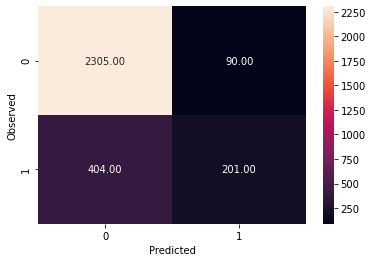

None


In [34]:
print('Confusion Matrix')
print(draw_cm(y_test,y_pred))


### Accuracy Score, Precision and Recall.

In [35]:
print(accuracy_score(y_test,y_pred)*100,'%')

83.53333333333333 %


In [36]:
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()


Recall: 0.3322314049586777

Precision: 0.6907216494845361

F1 Score: 0.4486607142857143



### Making another attempt to improve the model by changing the activation function of hidden layer to softmax

In [44]:
model3 = Sequential()

In [45]:
model3.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
model3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))

model3.compile(optimizer = 'adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [46]:
model3.fit(X_train, y_train.values, batch_size = 10, epochs = 10, verbose = 1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 2s 347us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 2/10
7000/7000 [==============================] - 2s 328us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 3/10
7000/7000 [==============================] - 2s 328us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 4/10
7000/7000 [==============================] - 2s 332us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 5/10
7000/7000 [==============================] - 2s 313us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 6/10
7000/7000 [==============================] - 2s 327us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 7/10
7000/7000 [==============================] - 2s 333us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 8/10
7000/7000 [==============================] - 3s 385us/sample - loss: 0.0000e+00 - accuracy: 0.2046
Epoch 9/10
7000/7000 [==============================] - 2s 334us/sample - loss: 0.0000e+00 - accur

#### Comments: Very low accuraccy of 0.2046, so we will stick to previous model with accuraccy of 83.34 %